In [41]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from tensorflow.keras import Sequential, layers, models
import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Activation
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns

 ### Load data
 

In [3]:
y_labels = pd.read_csv("data/sentence_transformers_clusters_2.csv")
y_labels_2 = pd.read_csv("C:\\Users\\Admin\\Documents\\MindSee\\data\\cluster_18.csv")
X_train = np.load("C:\\Users\\Admin\\Documents\\MindSee\\data\\nsd_train_fmriavg_nsdgeneral_sub1.npy")
X_test = np.load("C:\\Users\\Admin\\Documents\\MindSee\\data\\nsd_test_fmriavg_nsdgeneral_sub1.npy")

In [4]:
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
y=y_labels['label'].values

In [6]:
y_2 = y_labels_2['label'].values

In [8]:
y_2

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [11]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_train, y, test_size=0.2, random_state=42)

In [12]:
# Split the dataset into training and testing sets
X_train_new_2, X_test_new_2, y_train_2, y_test_2 = train_test_split(X_train, y_2, test_size=0.2, random_state=42)

In [13]:
# Create the DNN model 
model = Sequential()

# Add input layer
model.add(Dense(1000, input_dim=X_train_new.shape[1], activation='relu'))


# Add hidden layers
model.add(Dense(1500, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(800, activation='relu'))



model.add(Dense(800, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(500, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(Dense(200, activation='relu'))

# Add output layer with softmax activation for multi-class classification
model.add(Dense(45, activation='softmax'))


# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Set up early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=30, verbose=1, restore_best_weights = True)

# Train the model with early stopping
history = model.fit(X_train_new_2, y_train_2, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stopping])

Epoch 1/100
178/178 [==============================] - 5s 10ms/step - loss: 2.8733 - accuracy: 0.1690 - val_loss: 2.2879 - val_accuracy: 0.2736
Epoch 2/100
178/178 [==============================] - 1s 8ms/step - loss: 2.2825 - accuracy: 0.2697 - val_loss: 2.1473 - val_accuracy: 0.3096
Epoch 3/100
178/178 [==============================] - 1s 8ms/step - loss: 2.0438 - accuracy: 0.3180 - val_loss: 1.8809 - val_accuracy: 0.3540
Epoch 4/100
178/178 [==============================] - 1s 8ms/step - loss: 1.8426 - accuracy: 0.3738 - val_loss: 1.8208 - val_accuracy: 0.4034
Epoch 5/100
178/178 [==============================] - 1s 8ms/step - loss: 1.6356 - accuracy: 0.4234 - val_loss: 1.7497 - val_accuracy: 0.4337
Epoch 6/100
178/178 [==============================] - 1s 8ms/step - loss: 1.5013 - accuracy: 0.4738 - val_loss: 1.6936 - val_accuracy: 0.4457
Epoch 7/100
178/178 [==============================] - 1s 7ms/step - loss: 1.3391 - accuracy: 0.5228 - val_loss: 1.8012 - val_accuracy: 0.426

In [14]:
saved_model=models.load_model('..\\models\\classifier')

 ### Predict on DNN Classifier

#### DNN 45  classes

In [15]:
y_pred_1 = saved_model.predict(X_test_new)
y_pred_1 = np.argmax(y_pred_1, axis = 1)

56/56 [==============================] - 1s 8ms/step


#### DNN 18  classes

In [16]:
y_pred_2 = model.predict(X_test_new)
y_pred_2 = np.argmax(y_pred_2, axis = 1)

56/56 [==============================] - 0s 6ms/step


## DNN Confusion matrix

### 45 Classes

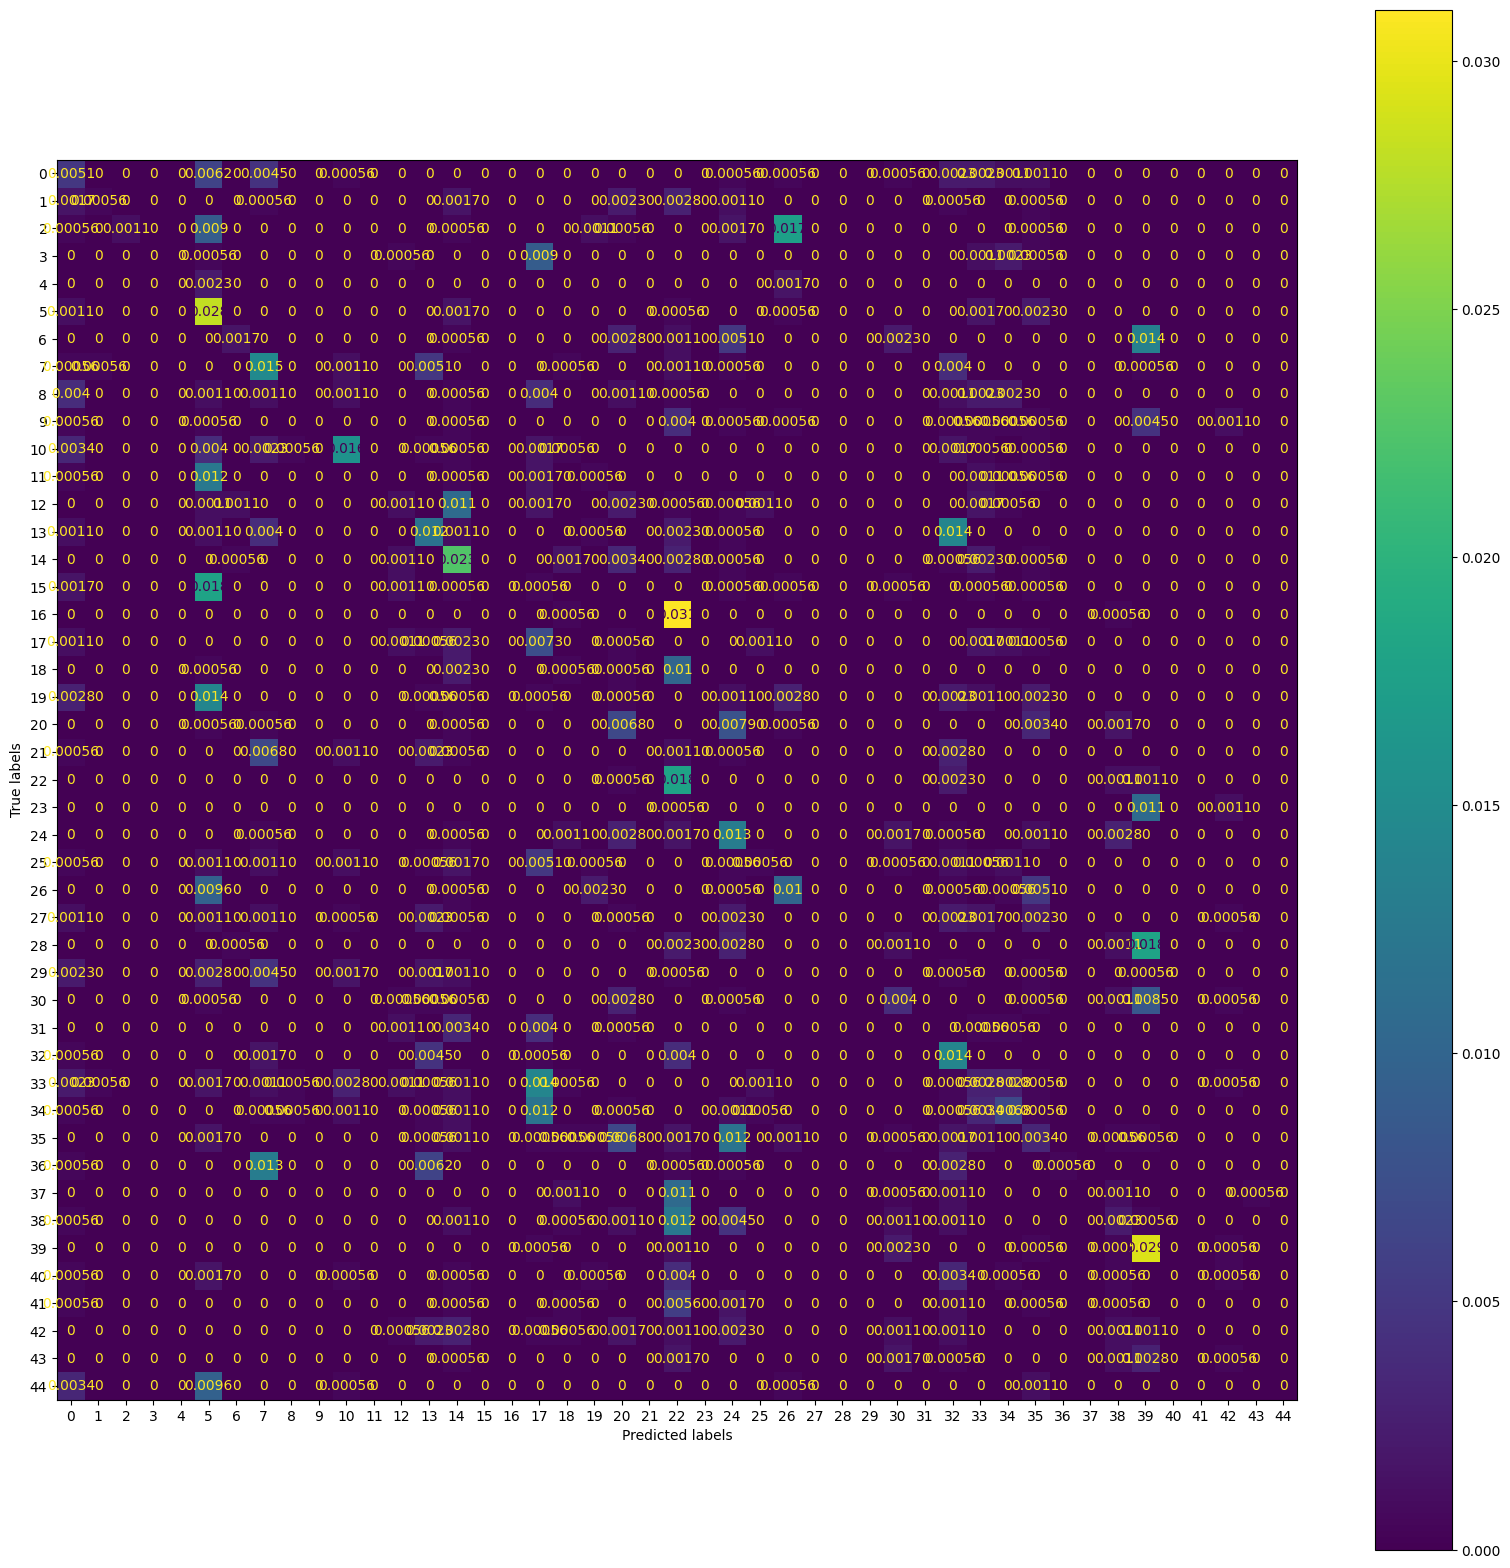

In [80]:
cm_45_dnn=confusion_matrix(y_test, y_pred_1, normalize='all')
# Assuming you have the confusion matrix 'cm' already computed

# Increase figsize by 10x10
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_45_dnn)
disp.plot(ax=ax)

# Customize the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

### 18 Clusters

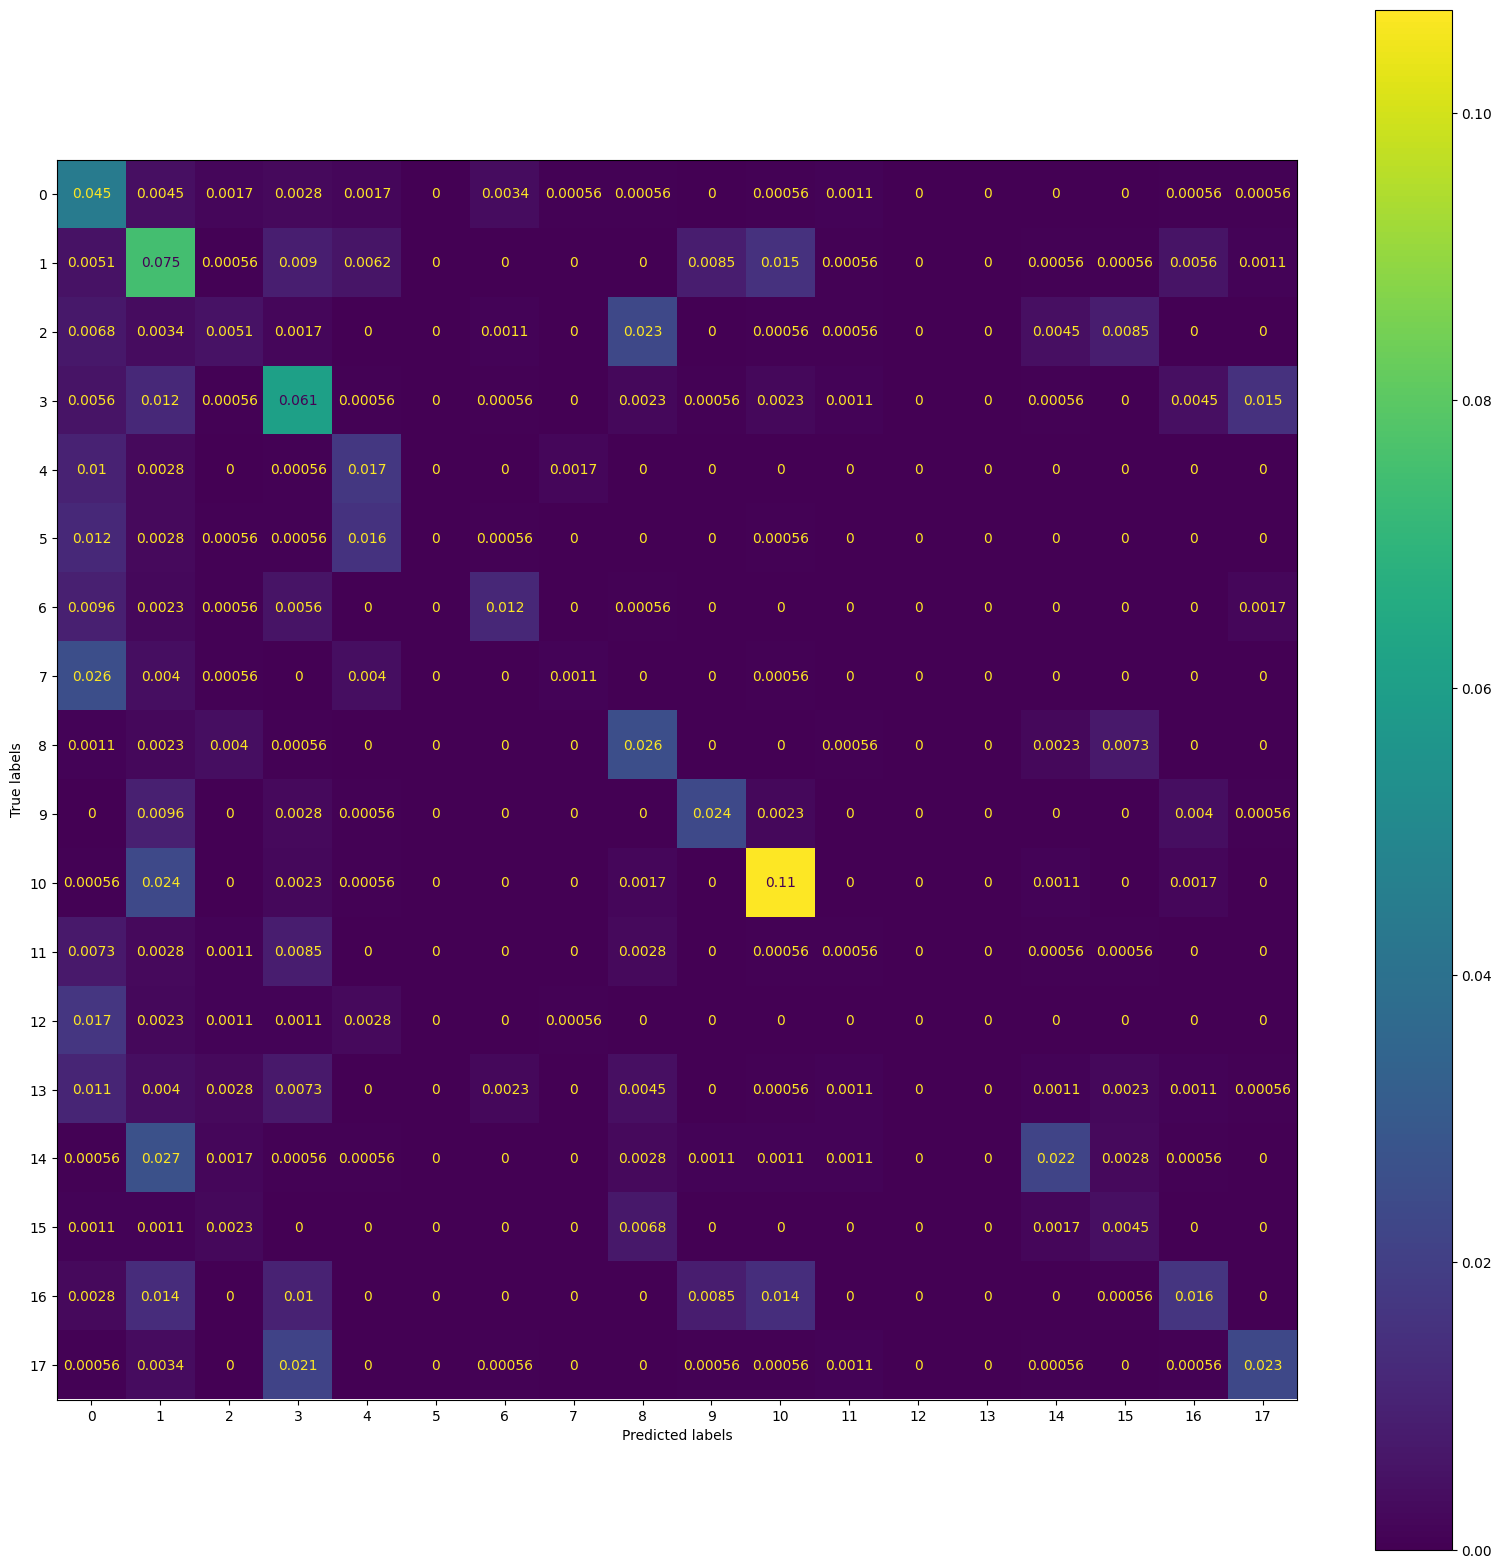

In [18]:
cm_18_dnn=confusion_matrix(y_test_2, y_pred_2, normalize='all')
# Assuming you have the confusion matrix 'cm' already computed

# Increase figsize by 10x10
fig, ax = plt.subplots(figsize=(20, 20))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_18_dnn)
disp.plot(ax=ax)

# Customize the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## KNN


### 45 Clusters

In [21]:
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=38)
model_knn.fit(X_train_new,y_train)

KNeighborsClassifier(n_neighbors=38)

In [22]:
# models.save_model(model_knn, '..\\models\\model_knn')
# model_knn=models.load_model('..\\models\\model_knn')

In [23]:
y_pred_knn = model_knn.predict(X_test_new_2)
y_pred_knn

array([39, 37, 44, ...,  1, 35,  5], dtype=int64)

### 18 Clusters

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model_knn_2 = KNeighborsClassifier(n_neighbors=22)
model_knn_2.fit(X_train_new_2,y_train_2)

KNeighborsClassifier(n_neighbors=22)

In [37]:
y_pred_2_knn = model_knn_2.predict(X_test_new_2)
y_pred_2_knn

array([10,  1,  0, ...,  3,  1,  7], dtype=int64)

## KNN confusion matrix

### 45 clusters

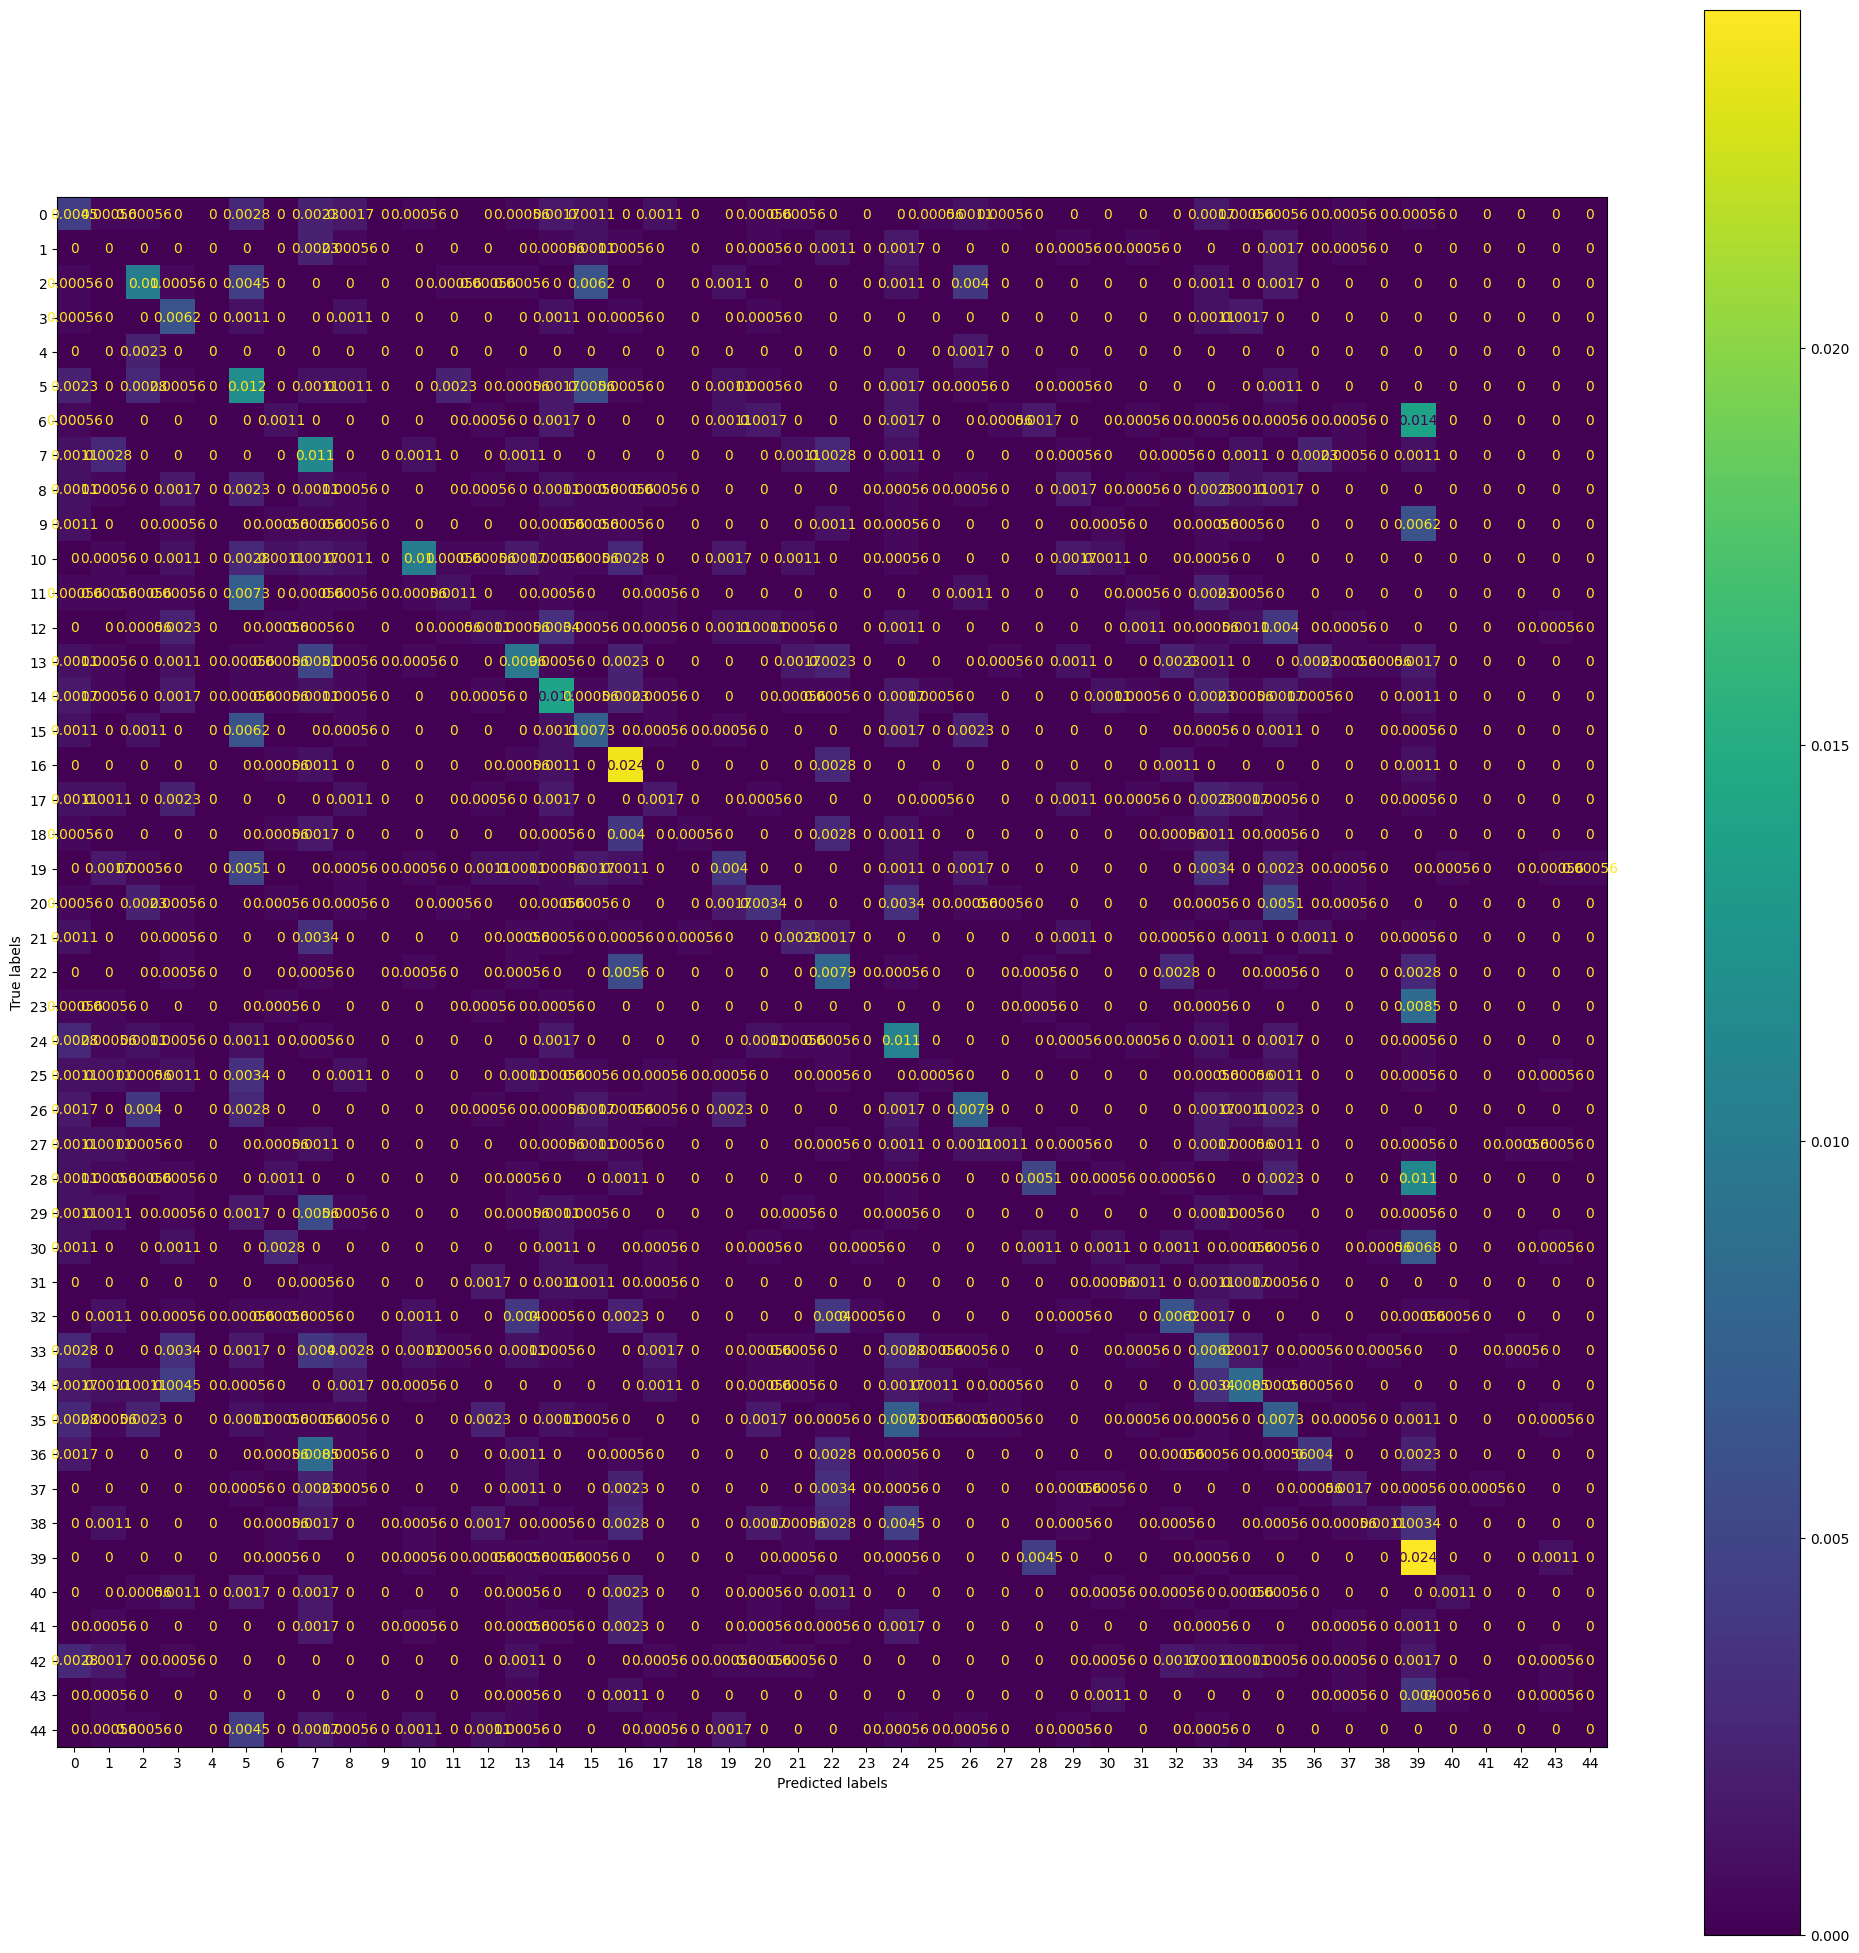

In [28]:
cm2=confusion_matrix(y_test, y_pred_knn, normalize='all')
fig, ax = plt.subplots(figsize=(25, 25))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot(ax=ax)

# Customize the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

## 18 Clusters

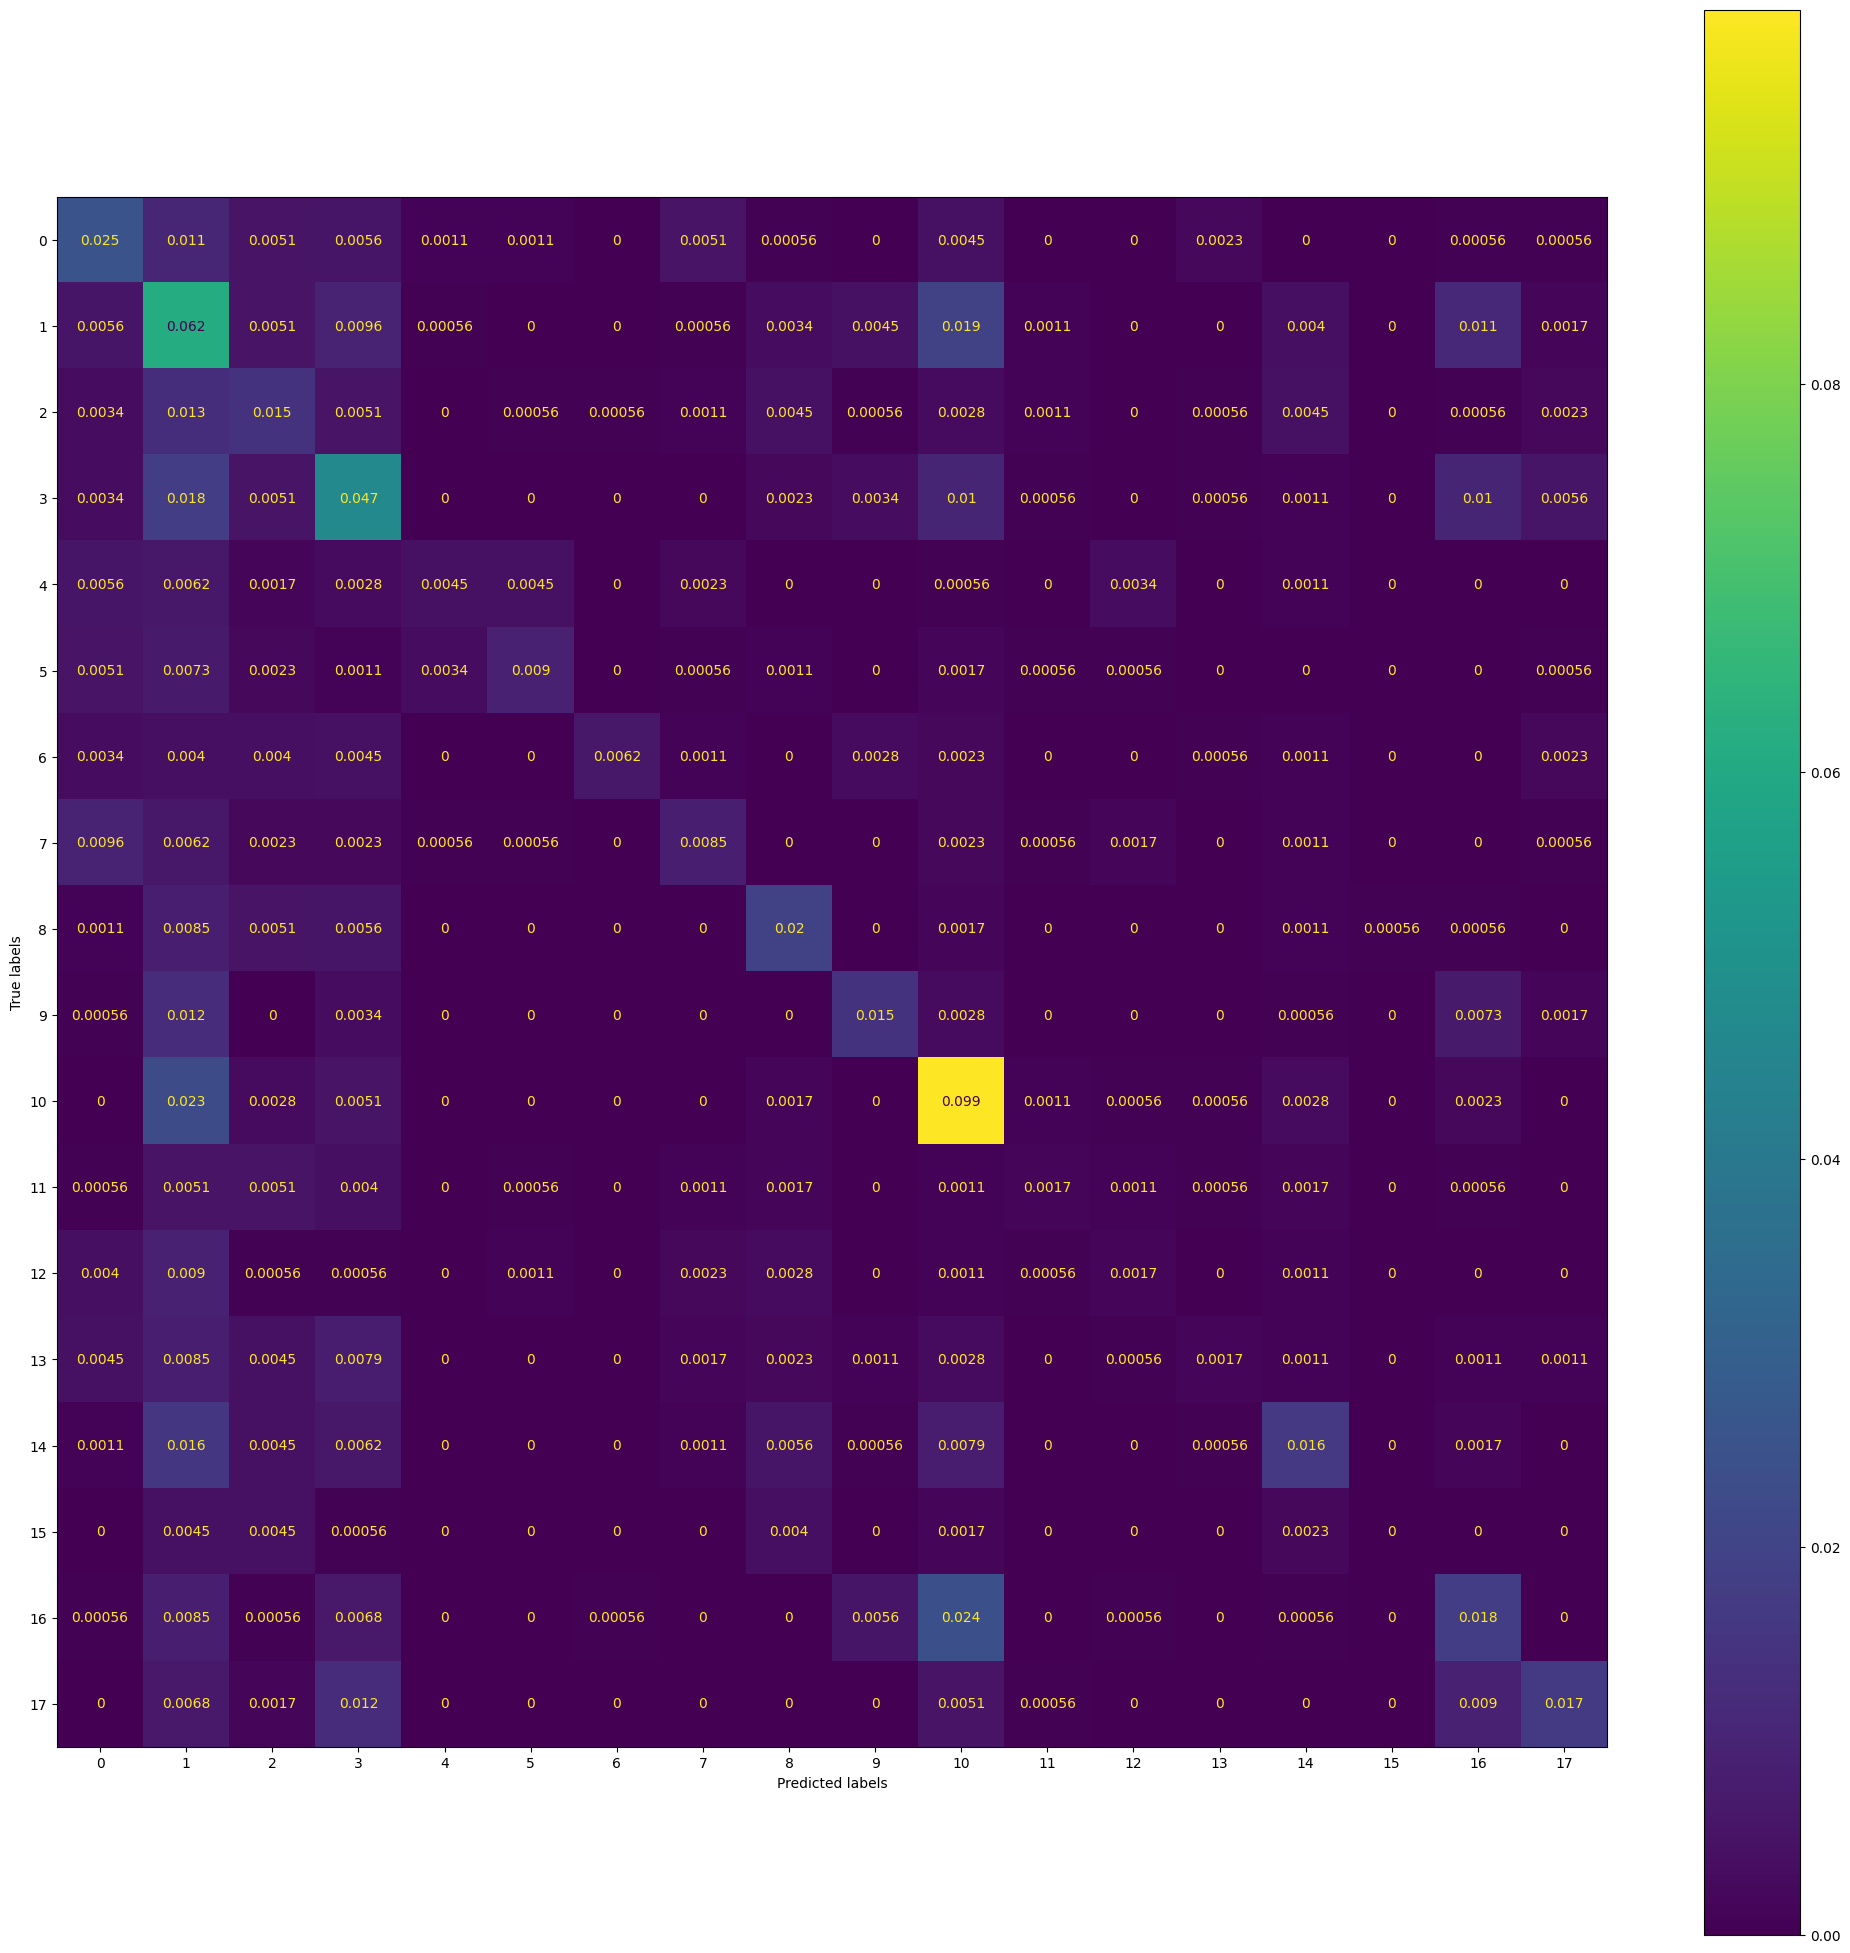

In [38]:
cm3=confusion_matrix(y_test_2, y_pred_2_knn, normalize='all')
fig, ax = plt.subplots(figsize=(25, 25))

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot(ax=ax)

# Customize the plot
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [103]:
# k_values = range(25, 40)
# scores = []

# from sklearn.model_selection import cross_val_score
# for k in k_values:
   
#     knn = KNeighborsClassifier(n_neighbors=k)
    
    
#     score = np.mean(cross_val_score(knn, X_train_new, y_train, cv=5))
#     scores.append(score)
    
# import matplotlib.pyplot as plt
# plt.plot( k_values, scores)
# plt.xlabel('K')
# plt.ylabel('Score')
# plt.title('KNNRegressor Score vs. K')
# plt.show()